In [1]:
%matplotlib inline

# Overlaying speed traces of two laps

Compare two fastest laps by overlaying their speed traces.


In [2]:
import fastf1.plotting
from fastf1 import utils
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
import matplotlib.cbook as cbook
import matplotlib.image as image

import numpy as np
import pandas as pd

fastf1.Cache.enable_cache('cache')  # replace with your cache directory



In [3]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl()

In [4]:
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
print('------ Graph Type ------')
print('Speed')
print('RPM')
print('nGear')
print('Throttle')
print('--------------------------')
grafico = input('Columna a Graficar: ')
piloto1 = input('Piloto 1: ')
piloto2 = input('Piloto 2: ')


Año: 2022
Round: 21
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R
------ Graph Type ------
Speed
RPM
nGear
Throttle
--------------------------
Columna a Graficar: Throttle
Piloto 1: PER
Piloto 2: LEC


In [5]:
# load a session and its telemetry data
session = fastf1.get_session(year, wknd, ses)
session.load()

core           INFO 	Loading data for São Paulo Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '44', '55', '16', '14', '1', '11', '31', '77', '18', '5', '24', '47', '10', '23', '6', '22', '4', '20', '3']


First, we select the two laps that we want to compare



In [6]:
driver1_lap = session.laps.pick_driver(piloto1).pick_fastest()
driver2_lap = session.laps.pick_driver(piloto2).pick_fastest()

Next we get the telemetry data for each lap. We also add a 'Distance' column
to the telemetry dataframe as this makes it easier to compare the laps.



In [7]:
driver1_tel = driver1_lap.get_car_data().add_distance()
driver2_tel = driver2_lap.get_car_data().add_distance()

In [8]:
driver1_tel

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-11-13 19:29:02.650,11021,310,8,100,False,1,car,0 days 00:00:00.223000,0 days 02:28:01.624000,19.202778
1,2022-11-13 19:29:02.930,11055,310,8,100,False,1,car,0 days 00:00:00.503000,0 days 02:28:01.904000,43.313889
2,2022-11-13 19:29:03.170,11058,311,8,100,False,1,car,0 days 00:00:00.743000,0 days 02:28:02.144000,64.047222
3,2022-11-13 19:29:03.330,11099,311,8,100,False,1,car,0 days 00:00:00.903000,0 days 02:28:02.304000,77.869444
4,2022-11-13 19:29:03.650,10976,312,8,100,False,1,car,0 days 00:00:01.223000,0 days 02:28:02.624000,105.602778
...,...,...,...,...,...,...,...,...,...,...,...
273,2022-11-13 19:30:15.410,10894,306,8,100,False,0,car,0 days 00:01:12.983000,0 days 02:29:14.384000,4128.960000
274,2022-11-13 19:30:15.690,10930,307,8,100,False,0,car,0 days 00:01:13.263000,0 days 02:29:14.664000,4152.837778
275,2022-11-13 19:30:15.890,10973,307,8,100,False,0,car,0 days 00:01:13.463000,0 days 02:29:14.864000,4169.893333
276,2022-11-13 19:30:16.210,10993,309,8,100,False,0,car,0 days 00:01:13.783000,0 days 02:29:15.184000,4197.360000


In [9]:
delta_time, ref_tel , compare_tel = utils.delta_time(driver2_lap,driver1_lap )


Finally, we create a plot and plot both speed traces.
We color the individual lines with the driver's team colors.



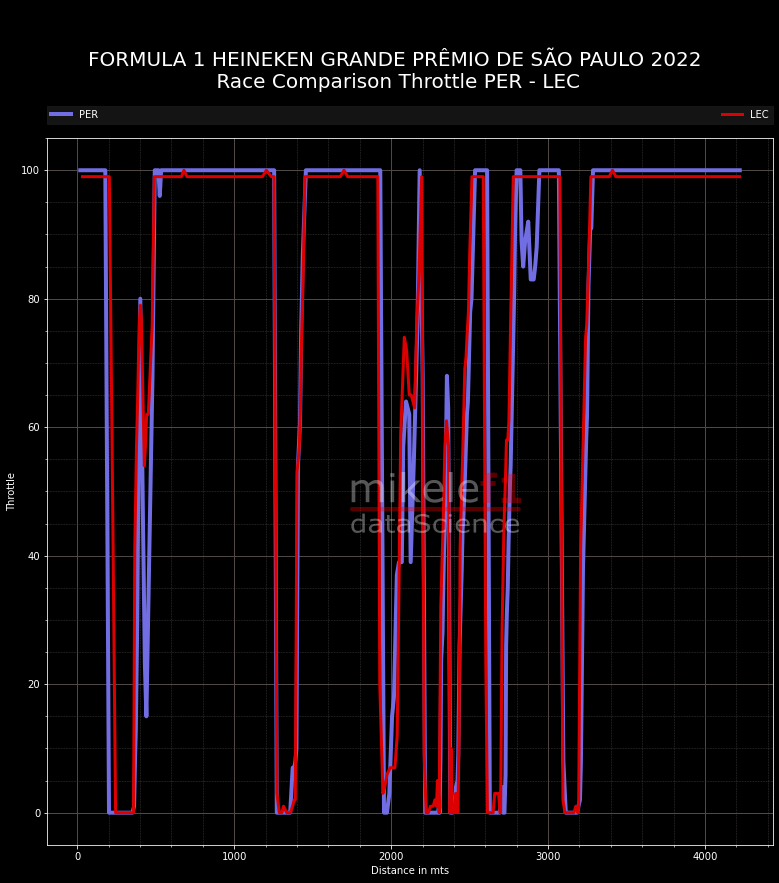

In [10]:
with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)
    
team1_color = fastf1.plotting.team_color(driver1_lap['Team'])
team2_color = fastf1.plotting.team_color(driver2_lap['Team'])

color1 = fastf1.plotting.driver_color(piloto1)
color2 = fastf1.plotting.driver_color(piloto2)

plt.rcParams['figure.figsize'] = [13, 13]

plt.style.use('dark_background')


fig, ax = plt.subplots()
#ax.plot(driver1_tel['Distance'], driver1_tel['Speed'], color=color1, label=piloto1)
#ax.plot(driver2_tel['Distance'], driver2_tel['Speed'], color=color2, label=piloto2)

ax.plot(driver1_tel['Distance'], driver1_tel[grafico], color=color1, label=piloto1)
ax.plot(driver2_tel['Distance'], driver2_tel[grafico], color=color2, label=piloto2)



#--------------

ax.set_xlabel('Distance in mts')
ax.set(ylabel=grafico)
ax.legend

ax.get_lines()[0].set_linewidth(4)
ax.get_lines()[1].set_linewidth(3)

#--------------
if ses== 'R':
    titulo = 'Race'
elif ses == 'FP1' or ses == 'FP2' or ses == 'FP2':
    titulo = ses
elif ses == 'Q':
    titulo = 'Qualy'
elif ses == 'SQ':
    titulo = 'Sprint Race'
else:
    titulo = 'Qualy'

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
           ncol=3, mode="expand", borderaxespad=0.)
plt.suptitle(f"\n\n{session.event['OfficialEventName']} \n {titulo} Comparison {grafico} {piloto1} - {piloto2} \n"
             , size=20, y=1.02)

fig.figimage(im, xo=350, yo=350, zorder=13, alpha=.35)


#plt.savefig("2022-12-{sess}-C-{driver1}-{driver2}.png")
#plt.savefig("2022-13-R-VER-HAM.png")

nombrearchivo = str(year)+'-'+str(wknd)+'-C'+grafico+ses+'-'+piloto1+'-'+piloto2+'.png'
plt.savefig(nombrearchivo)

plt.show()